In [1]:
from pandas import read_csv
from os import getcwd
from single_sim import simulate
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#### paths ####
cwd = getcwd()
FITTS_PARAMS_PATH = cwd + "\\..\\data\\task\\linreg_params.csv"
ALL_DATA_PATH = cwd + "\\..\\data\\all_data.csv"

###### RING PARAMETERS ######
FITTS_ID_LIST = [2.788, 3.68, 3.68, 4.623]
RING_AMPLITUDES = [0.118, 0.118, 0.236, 0.236]
TARGET_WIDTHS = [0.02, 0.01, 0.02, 0.01]

In [3]:
def get_raw_data(path):
    df = read_csv(path)
    return df

In [4]:
fitts_params_df = get_raw_data(FITTS_PARAMS_PATH)
all_data_df = get_raw_data(ALL_DATA_PATH)

In [5]:
estimated_times_med = []
estimated_times_high = []

recorded_times_med = []
recorded_times_high = []

for (index, trial) in all_data_df.iterrows():
    
    ###### get the trial parameters ######
    part_id = trial['part_id']
    ring_id = trial['ring_id']
    alpha = trial['auto_num']
    recorded_time = trial['average_mt']

    ###### get the Fitts' linear regression parameters for the current participant
    params_row = fitts_params_df[fitts_params_df['pid']==part_id]
    a, b = params_row['intercept'].tolist()[0], params_row['slope'].tolist()[0]
    
    ###### get the movement amplitude + width ######
    A = RING_AMPLITUDES[ring_id-1]
    W = TARGET_WIDTHS[ring_id-1]
    
    ###### perform the simulation to get the estimated time of completion ######
    t = simulate(a, b, A, W, alpha, use_w=False, use_alpha=True)
    
    if alpha == 0.4:
        estimated_times_med.append(t)
        recorded_times_med.append(recorded_time)
    if alpha == 0.8:
        estimated_times_high.append(t)
        recorded_times_high.append(recorded_time)


Linear regression results:
intercept = 0.230, slope = 0.484
correlation = 0.823, p = 0.000, std_err = 0.034


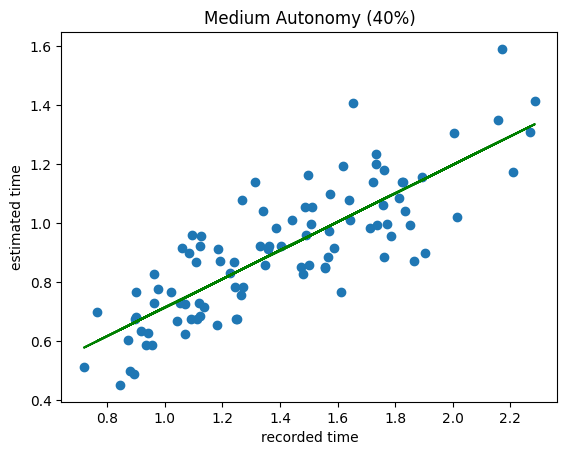

In [11]:
###### perform linear regression ######
slope, intercept, r, p, std_err = linregress(recorded_times_med, estimated_times_med)

print("Linear regression results:")
print("intercept = %.3f, slope = %.3f" % (intercept, slope))
print("correlation = %.3f, p = %.3f, std_err = %.3f" % (r, p, std_err))
print("="*50)

# ratio_list = [estimated_times_med[i]/recorded_times_med[i] for i in range(len(estimated_times_med))]
# ave_ratio = sum(ratio_list)/len(ratio_list)
# print("Average estimated/recorded ratio = %.3f" % ave_ratio)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, recorded_times_med))

plt.scatter(recorded_times_med, estimated_times_med)
plt.plot(recorded_times_med, model, "g")
plt.xlabel("recorded time")
plt.ylabel("estimated time")
plt.title("Medium Autonomy (40%)")
plt.show()

Linear regression results:
intercept = 0.159, slope = 0.341
correlation = 0.817, p = 0.000, std_err = 0.025


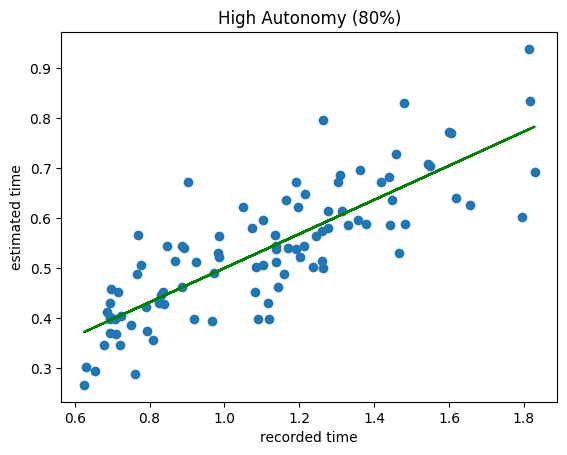

In [12]:
###### perform linear regression ######
slope, intercept, r, p, std_err = linregress(recorded_times_high, estimated_times_high)

print("Linear regression results:")
print("intercept = %.3f, slope = %.3f" % (intercept, slope))
print("correlation = %.3f, p = %.3f, std_err = %.3f" % (r, p, std_err))
print("="*50)

# ratio_list = [estimated_times_high[i]/recorded_times_high[i] for i in range(len(estimated_times_high))]
# ave_ratio = sum(ratio_list)/len(ratio_list)
# print("Average estimated/recorded ratio = %.3f" % ave_ratio)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, recorded_times_high))

plt.scatter(recorded_times_high, estimated_times_high)
plt.plot(recorded_times_high, model, "g")
plt.xlabel("recorded time")
plt.ylabel("estimated time")
plt.title("High Autonomy (80%)")
plt.show()